In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [3]:
!mkdir Data
!mkdir Annotations

In [3]:
!tar -xzvf "/content/drive/MyDrive/ETHPedestrian/seq02-img-left.tar.gz" -C "/content/Data/"

image_00000930_0.png
image_00000931_0.png
image_00000932_0.png
image_00000933_0.png
image_00000934_0.png
image_00000935_0.png
image_00000936_0.png
image_00000937_0.png
image_00000938_0.png
image_00000939_0.png
image_00000940_0.png
image_00000941_0.png
image_00000942_0.png
image_00000943_0.png
image_00000944_0.png
image_00000945_0.png
image_00000946_0.png
image_00000947_0.png
image_00000948_0.png
image_00000949_0.png
image_00000950_0.png
image_00000951_0.png
image_00000952_0.png
image_00000953_0.png
image_00000954_0.png
image_00000955_0.png
image_00000956_0.png
image_00000957_0.png
image_00000958_0.png
image_00000959_0.png
image_00000960_0.png
image_00000961_0.png
image_00000962_0.png
image_00000963_0.png
image_00000964_0.png
image_00000965_0.png
image_00000966_0.png
image_00000967_0.png
image_00000968_0.png
image_00000969_0.png
image_00000970_0.png
image_00000971_0.png
image_00000972_0.png
image_00000973_0.png
image_00000974_0.png
image_00000975_0.png
image_00000976_0.png
image_0000097

In [4]:
x = cv2.imread('/content/Data/image_00000934_0.png')
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

In [5]:
x.shape

(480, 640, 3)

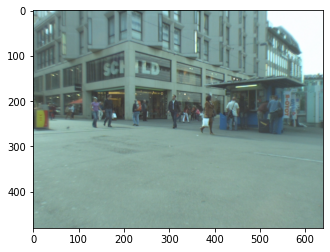

In [6]:
plt.imshow(x)

In [7]:
a = [(126, 192, 157, 262), (153, 184, 183, 262), (217, 197, 240, 260), (238, 197, 257, 247), (295, 184, 333, 264),
     (361, 188, 407, 279), (422, 190, 460, 271), (448, 186, 482, 267), (524, 265, 496, 197), (516, 180, 552, 279)]    
for i in range(len(a)):
  z = a[i]
  y = cv2.rectangle(x,(z[0],z[1]),(z[2],z[3]),(0,255,0),1)

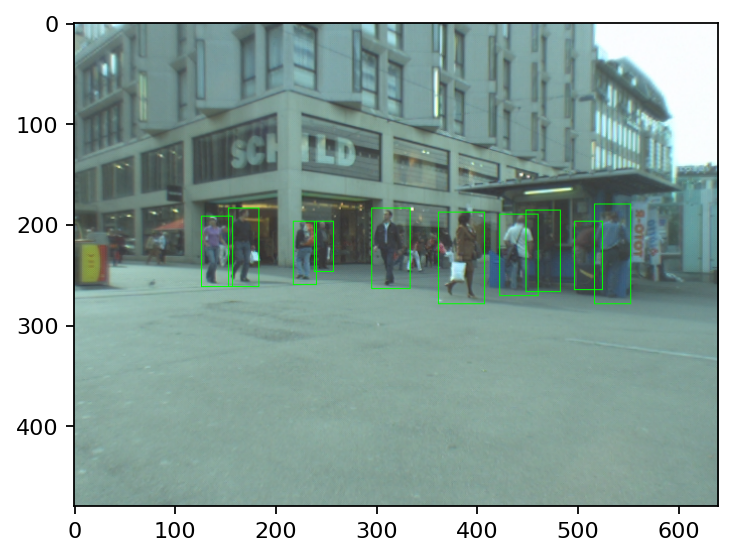

In [8]:
plt.figure(dpi=160)
plt.imshow(y)

In [4]:
data = pd.read_csv("/content/drive/MyDrive/ETHPedestrian/linthescher-annot.txt", sep='"|/|;|:|.png', header=None, engine='python')
data

,0,1,2,3,4,5,6
0,NaN,left,image_00000930_0,NaN,NaN,"(120, 192, 152, 262), (141, 182, 178, 258), (...",NaN
1,NaN,left,image_00000931_0,NaN,NaN,NaN,NaN
2,NaN,left,image_00000932_0,NaN,NaN,NaN,NaN
3,NaN,left,image_00000933_0,NaN,NaN,NaN,NaN
4,NaN,left,image_00000934_0,NaN,NaN,"(126, 192, 157, 262), (153, 184, 183, 262), (...",NaN
...,...,...,...,...,...,...,...
1202,NaN,left,image_00002132_0,NaN,NaN,NaN,NaN
1203,NaN,left,image_00002133_0,NaN,NaN,NaN,NaN
1204,NaN,left,image_00002134_0,NaN,NaN,"(55, 316, 4, 164), (101, 215, 133, 280), (241...",NaN
1205,NaN,left,image_00002135_0,NaN,NaN,NaN,NaN


In [5]:
data.pop(0)
data.pop(1)
data.pop(3)
data.pop(4)
data.pop(6)
data

,2,5
0,image_00000930_0,"(120, 192, 152, 262), (141, 182, 178, 258), (..."
1,image_00000931_0,NaN
2,image_00000932_0,NaN
3,image_00000933_0,NaN
4,image_00000934_0,"(126, 192, 157, 262), (153, 184, 183, 262), (..."
...,...,...
1202,image_00002132_0,NaN
1203,image_00002133_0,NaN
1204,image_00002134_0,"(55, 316, 4, 164), (101, 215, 133, 280), (241..."
1205,image_00002135_0,NaN


In [6]:
data = data.dropna()
data

,2,5
0,image_00000930_0,"(120, 192, 152, 262), (141, 182, 178, 258), (..."
4,image_00000934_0,"(126, 192, 157, 262), (153, 184, 183, 262), (..."
8,image_00000938_0,"(113, 190, 147, 269), (145, 186, 181, 264), (..."
12,image_00000942_0,"(96, 184, 136, 264), (126, 171, 168, 262), (1..."
16,image_00000946_0,"(98, 184, 143, 271), (130, 178, 172, 273), (1..."
...,...,...
1188,image_00002118_0,"(0, 140, 44, 323), (36, 159, 82, 293), (103, ..."
1192,image_00002122_0,"(0, 136, 23, 329), (16, 157, 65, 304), (95, 2..."
1196,image_00002126_0,"(0, 153, 48, 301), (86, 198, 122, 265), (250,..."
1200,image_00002130_0,"(4, 157, 54, 312), (99, 206, 132, 270), (247,..."


In [7]:
name = np.array(data[2])
label = np.array(data[5])

In [8]:
%cd Annotations

/content/Annotations


Data must be in fomat of xcenter ycenter w h 

In [9]:
for i in range(len(name)):
  file = open('{}.txt'.format(name[i]),'w+')
  q = re.split("\), \(| \(|\)", label[i])
  q = q[1:-1]
  for j in range(len(q)):
    z = q[j].split(', ')
    a, b, c, d = z[0], z[1], z[2], z[3]
    z[0] = str(((int(a)+int(c))/2)/640)
    z[1] = str(((int(b)+int(d))/2)/480)
    z[2] = str((abs(int(c)-int(a)))/640)
    z[3] = str((abs(int(d)-int(b)))/480)
    file.write('0 '+" ".join(z)+'\n')
  file.close()


In [10]:
!zip -r /content/Annotations.zip /content/Annotations

  adding: content/Annotations/ (stored 0%)
  adding: content/Annotations/image_00001650_0.txt (deflated 64%)
  adding: content/Annotations/image_00001386_0.txt (deflated 69%)
  adding: content/Annotations/image_00001258_0.txt (deflated 48%)
  adding: content/Annotations/image_00001342_0.txt (deflated 67%)
  adding: content/Annotations/image_00002086_0.txt (deflated 66%)
  adding: content/Annotations/image_00001089_0.txt (deflated 68%)
  adding: content/Annotations/image_00001022_0.txt (deflated 73%)
  adding: content/Annotations/image_00001498_0.txt (deflated 58%)
  adding: content/Annotations/image_00001758_0.txt (deflated 63%)
  adding: content/Annotations/image_00001114_0.txt (deflated 63%)
  adding: content/Annotations/image_00001266_0.txt (deflated 67%)
  adding: content/Annotations/image_00001698_0.txt (deflated 66%)
  adding: content/Annotations/image_00001586_0.txt (deflated 60%)
  adding: content/Annotations/image_00001034_0.txt (deflated 67%)
  adding: content/Annotations/ima